# Trabalho: Séries de Fourier

<hr/>
Aluno: Alejo Perdomo Milar
<br/>
Curso: Engenharia Eletronica 2023.1
<br/>
Sinais e Sistemas
<hr/>

# Sobre o código

O código completo pode ser encontrado no link:
[]()
Recomenda-se que se clone / baixe o repositório acima na sua máquina para execução deste, bem como que se instale previamente python e as bibliotecas requeridas numpy, control, matplotlib, scipy. Caso esses passos não sejam atendidos, podem ocorrer erros durante a execução bem como um comportamento não esperado do código.

# Análise de requisítos

Requisitos do trabalho:
* Dado 2 sinais, deve-se realizar a decomposição desses sinais utilizando a série de Fourier
* Com as séries obitidas deve-se fazer um código capaz de:
  * Visualizar o sinal original bem como a sua versão reconstruida a partir dos coeficientes da série
  * Permitir que o usuário especifique a quantidade de coeficientes utilizado na série
  * Apresentar o gráfico de magnitude e fase da série para ambos os sinais

Objetivos:
* Confirmar como a simetria do sinal afeta os coeficientes da série;
* Observar a conexão entre o período fundamental e a distribuição das componentes no eixo de frequência;
* Examinar o erro resultante da aproximação por Série de Fourier devido às descontinuidades do sinal.

Sistemas escolhidos com base no PDF de requisítos do trabalho:

## Primeiro

**Figura P6.1-3**

<img src="assets/f1.png">

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    e^{-t-k\frac{\pi}{2}} * 
      (u(t - k*\frac{\pi}{2}) - 
      u(t - (k*\frac{\pi}{2} + \frac{\pi}{2})))
$$

## Segundo

**Figura P6.1-5(a)**

<img src="assets/f2.png">

**Usando pulsos**

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    (x - 8k) * 
      (u(t - 8k) - 
      u(t - (8k + 2))) -
    (x - 8k) * 
      (u(t - (8k + 4)) - 
      u(t - (8k + 6)))       
$$
**Usando multipla sentença**
$$
\text{ou} \\
f_{saw}(x) = 
  \begin{cases}
    \text{x, } & \quad \text{if }  0 <= x <= 2 \\
    \text{-x,} & \quad \text{ if }  4 <= x <= 6 \\
    \text{0, } & \quad \text{ otherwise}
  \end{cases}

$$



# Dependencias do codigo

In [301]:
# Packages install
%pip install -q numpy control matplotlib scipy sympy

Note: you may need to restart the kernel to use updated packages.


In [302]:
# OS
import os
# Análise numérica
import numpy as np
import control
# Análise analitica
import sympy as sym
# Plots
import matplotlib.pyplot as plt
# Tipagem
from typing import List, Tuple
# Desabilitar warnings (somente para exportação)
import warnings
warnings.filterwarnings('ignore')

# Verificando a função 1

**Figura P6.1-3**

<img src="assets/f1.png">

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    e^{-t-k\frac{\pi}{2}} * 
      (u(t - k*\frac{\pi}{2}) - 
      u(t - (k*\frac{\pi}{2} + \frac{\pi}{2})))
$$

São feito os graficos da reperesentação analitica das funções para ver se coincidem com as figuras

In [303]:
def f_aux(x, k):
    return np.exp(-(x - ((np.pi / 2.0) * k))) * (np.heaviside(x - (k * (np.pi / 2.0)), 1) - np.heaviside(x - ((k * (np.pi / 2.0)) + (np.pi / 2.0)), 1))

def f(x):
    return [np.sum([ f_aux(d, k) for k in range(int(x.min() / (np.pi / 2)) - 2, int(x.max() / (np.pi / 2)) + 2) ]) for d in x ]

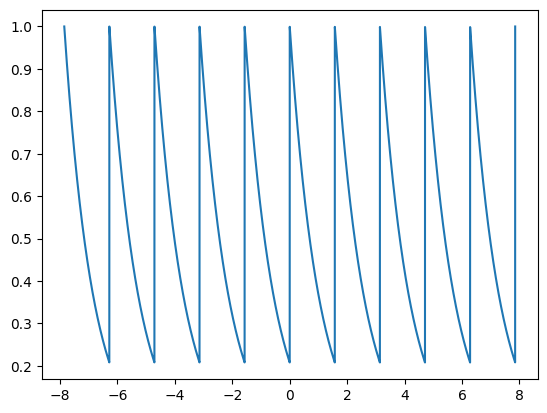

In [304]:
x = np.linspace(-5 * np.pi / 2, 5 * np.pi / 2, 10000)
y = f(x)
#y = f(x)

plt.plot(x, y)

## Calculando os coeficientes da serie de fourier (Item 1)

Os coeficientes da serie de fourier podem ser calculados por:

$ ck = \frac{1}{T_0} \int_{T_0} f(x)e^{-j w_0 t}dt$

In [305]:
# Periodo
t_0 = sym.pi / 2
# Frequencia
f_0 = 1 / t_0
# Frequencia angular
w_0 = 2 * sym.pi * f_0

# Definindo a variavel independente
t = sym.Symbol('t')
# Definindo o periodo
k = sym.Symbol('k')
# Definindo a função em um periodo
f_t = sym.exp(-t)
print("Função em um periodo: ")
f_t = sym.exp(-t)
display(f_t)

# Calculando a equação que define os coeficientes da serie de fourier para a função
ck = f_0 * sym.integrate(f_t * sym.exp(-sym.I * k * w_0 * t), (t, 0, t_0))

print("Coeficientes da serie de fourier:")
display(sym.simplify(ck))





Função em um periodo: 


exp(-t)

Coeficientes da serie de fourier:


2*I*(1 - exp(pi*(2*I*k + 1/2)))*exp(-pi*(2*I*k + 1/2))/(pi*(4*k - I))

## Recriando o sinal a partir da serie de fourier (item 2)

### Calculo

Para recriar a função são criadas ks_len harmonicas para cada t usando a função

$$ 
f_{new} =
\sum_{k = -\infty}^{\infty}
c_k * e^{k j w_0 t}
$$

In [306]:
def f_t_new(ks, t):
    # Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
    ck_k = sym.lambdify(k, ck)
    # Criando matriz de t com tamanho k para calcular a somatoria
    t_m = np.tile(t, (len(ks), 1))

    # Recriando a função de t a partir da serie de fourier
    return np.sum(np.transpose(ck_k(ks))[:, np.newaxis] * np.exp(1j * np.transpose(ks)[:, np.newaxis] * float(w_0) * t_m), axis=0)



### Grafico

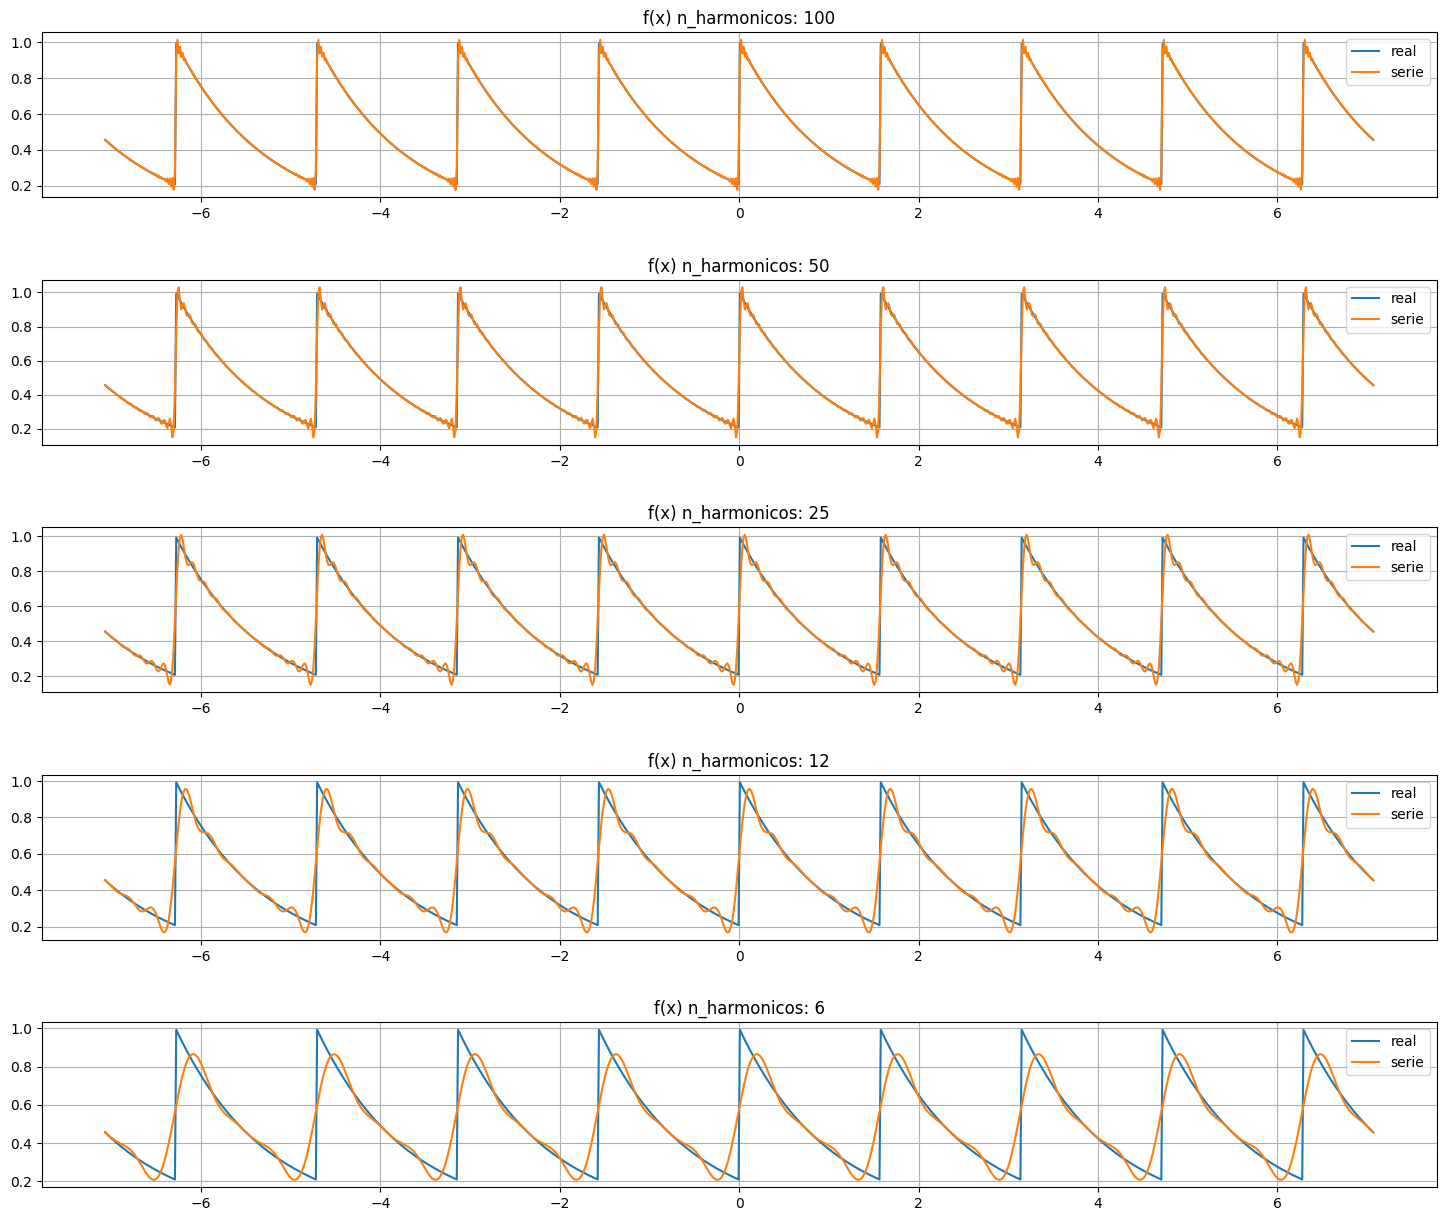

In [307]:
# Numero de periodos
t_len = 9

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 1000)

# Cria a figura e o plot e ativa o grid
fig, axs = plt.subplots(5, 1, figsize = (18, 15))
fig.subplots_adjust(hspace=0.5)



for i, ax in enumerate(axs):

    # Calculando para o numero de harmonicos
    # Numero de harmonicas
    ks_len = int(100 / (2 ** i))

    # Criando um vetor de harmonicas
    ks = np.arange(-int(ks_len / 2), int(ks_len / 2), 1)
    if (not (ks_len % 2 == 0)):
        ks_batata = ks
    # Configurando o grafico
    ax.set_title(f'f(x) n_harmonicos: {ks_len}')
    ax.grid()

    # Desenha o grafico da onda real
    ax.plot(t, np.abs(f(t)), label='real')   

    # Cria o grafico da onda estimada pela serie
    ax.plot(t, f_t_new(ks, t), label='serie')

    ax.legend()

# Show the plot
plt.show()

## Desenhando o grafico para um numero de harmonicas especifico (item 3)

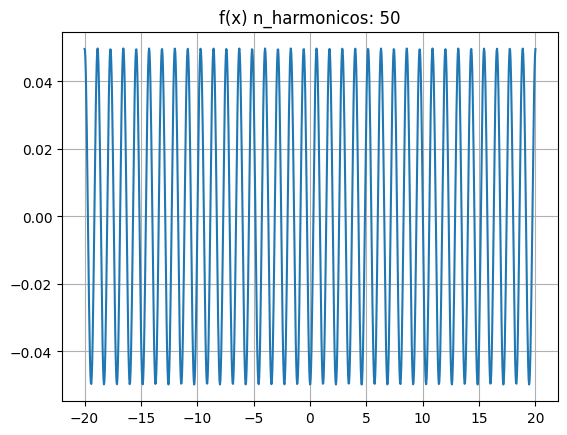

In [329]:
# Numero de periodos
t_len = 5

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 1000)

fig = plt.figure()
ax = fig.subplots()
# Numero de harmonicas
#ks_len = int(input('Numero de harmonicas'))

# Criando um vetor de harmonicas
#ks = np.arange(-ks_len / 2, ks_len / 2, 1)
ks = np.array([7])
ax.set_title(f'f(x) n_harmonicos: {ks_len}')

# Cria o grafico da onda estimada pela serie
ax.plot(t, f_t_new(ks, t), label='serie')
ax.grid()

## Criando o grafico da magnitude e fase dos coeficientes

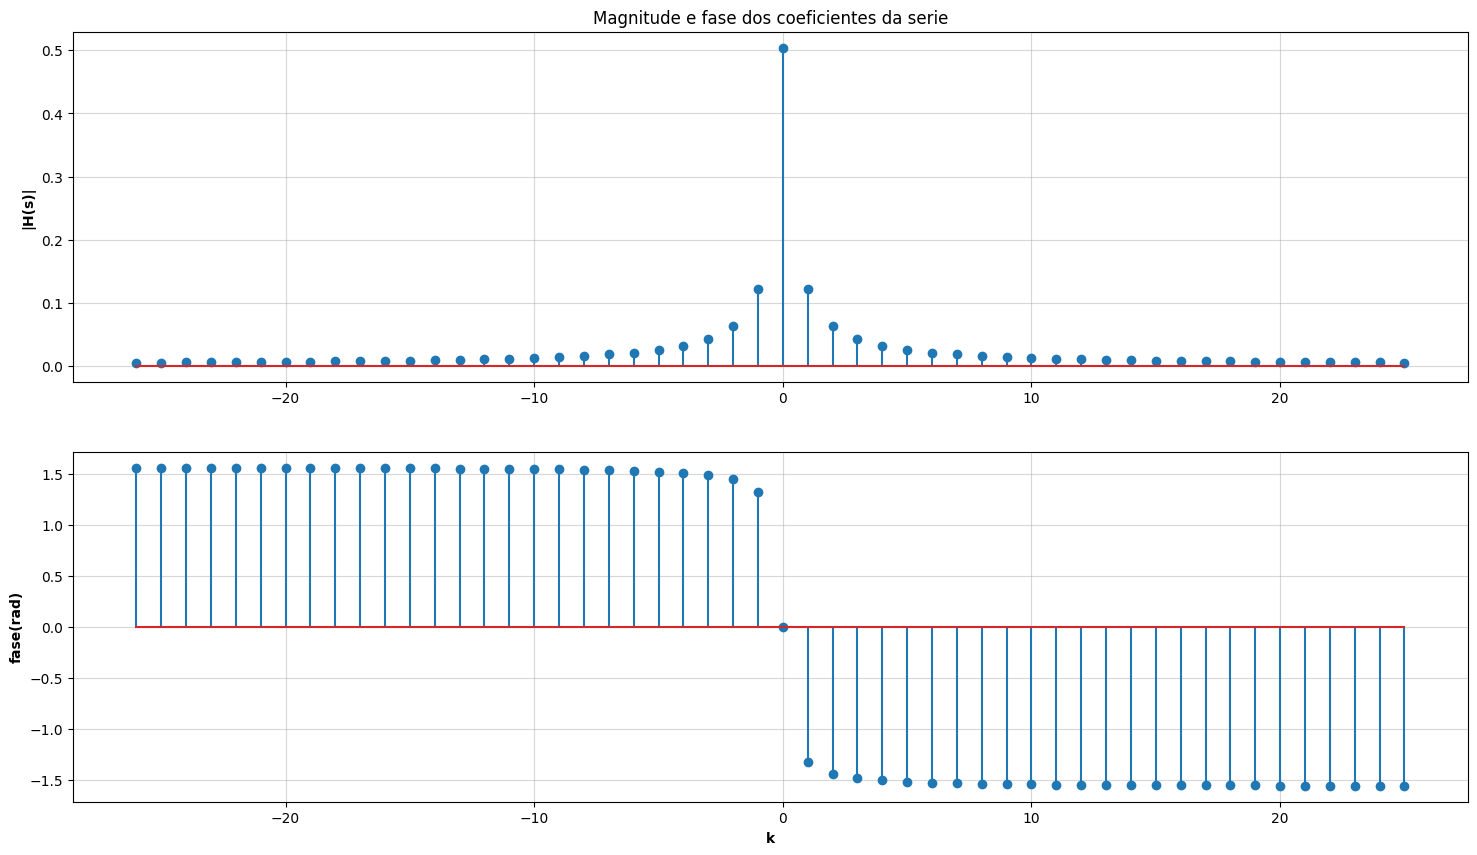

In [309]:
# Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
ck_k = sym.lambdify(k, ck)

# Numero de harmonicas
ks_len = 52

# Criando um vetor de harmonicas
ks = np.arange(-ks_len / 2, ks_len / 2, 1)

fig = plt.figure(figsize=(18, 10))
(ax, ax2) = fig.subplots(2, 1)
ax.set_title("Magnitude e fase dos coeficientes da serie")

# Grafico da magnitude dos coeficientes
ax.stem(ks, np.abs(ck_k(ks)), label = '|Ck|')
ax.grid(alpha = 0.5)
ax.set_ylabel("|H(s)|", weight = "bold")

# Grafico da fase dos coeficientes
#ax2 = ax.twinx()
ax2.stem(ks, np.angle(ck_k(ks)), label = 'Ck_fase')
ax2.set_ylabel("fase(rad)", weight = "bold")
ax2.set_xlabel("k", weight = "bold")
ax2.grid(alpha = 0.5)


## Analise

Quanto ao espaçamento das componentes no eixo de frequência, quanto maior o período fundamental de um sinal, menor será o espaçamento entre as componentes no domínio da frequência. Isso ocorre porque a frequência fundamental é inversamente proporcional ao período fundamental. Portanto, se o período fundamental aumenta, a frequência fundamental diminui e, consequentemente, as componentes no eixo de frequência ficam mais espaçadas.


Em relação ao erro de aproximação pela série de Fourier devido às descontinuidades do sinal, é importante mencionar que a série de Fourier é mais adequada para sinais contínuos e suaves. Quando um sinal apresenta descontinuidades, como é o caso do sinal $t=k * \frac{pi}{2}$, a série de Fourier pode apresentar dificuldades em aproximar corretamente o sinal nessas regiões de descontinuidade. Isso ocorre porque a série de Fourier é baseada em funções senoidais contínuas, enquanto as descontinuidades introduzem componentes de alta frequência que podem não ser capturadas adequadamente pela série, por isso ao aumentar o numero de harmonicas o sinal recriado condiz mais com o real

===>  **Adicionar detalhe que harmonicas impares deixam uma parte da onda negativa**

# Verificando a função 2

**Figura P6.1-5(a)**

<img src="assets/f2.png">

**Usando pulsos**

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    \frac{x - 8k}{2} * 
      (u(t - 8k) - 
      u(t - (8k + 2))) -
    \frac{x - 8k}{2} * 
      (u(t - (8k + 4)) - 
      u(t - (8k + 6)))       
$$
**Usando multipla sentença**
$$
\text{ou} \\
f_{saw}(x) = 
  \begin{cases}
    \frac{x}{2} & \quad \text{if }  0 <= x <= 2 \\
    \frac{-x}{2} & \quad \text{ if }  4 <= x <= 6 \\
    \text{0, } & \quad \text{ otherwise}
  \end{cases}

$$

São feito os graficos da reperesentação analitica das funções para ver se coincidem com as figuras

In [310]:
def f_aux(x, k):
    period = k * 8
    return (((x - period) / 2) * \
            (np.heaviside(x - period, 1) - np.heaviside(x - (period + 2), 1))) + \
            (-(x - (period + 4)) / 2) * \
            (np.heaviside(x - (period + 4), 1) - np.heaviside(x - (period + 6), 1))

def f(x):
    return [np.sum([ f_aux(d, k) for k in range(int(x.min() / 2) - 2, int(x.max() / 2) + 2) ]) for d in x ]

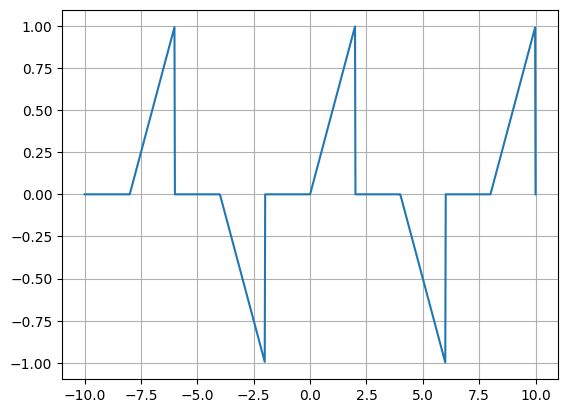

In [311]:
x = np.linspace(-10, 10, 1000)
y = f(x)
#y = f(x)
plt.grid()
plt.plot(x, y)

## Calculando os coeficientes da serie de fourier (Item 1)

Os coeficientes da serie de fourier podem ser calculados por:

$ ck = \frac{1}{T_0} \int_{T_0} f(x)e^{-j w_0 t}dt$

In [312]:
# Periodo
t_0 = sym.Rational(8, 1)
# Frequencia
f_0 = 1 / t_0
# Frequencia angular
w_0 = 2 * sym.pi * f_0

# Definindo a variavel independente
t = sym.Symbol('t')
# Definindo o periodo
k = sym.Symbol('k')
# Definindo a função em um periodo
f_t = sym.exp(-t)

print("Função em um periodo: ")
f_t = sym.Piecewise((t / 2, (t >= 0) & (t <= 2)), ((-(t - 4) / 2) , (t >= 4) & (t < 6)), (0, True))
display(f_t)

# Calculando a equação que define os coeficientes da serie de fourier para a função
ck = f_0 * sym.integrate(f_t * sym.exp(-sym.I * k * w_0 * t), (t, 0, t_0))

print("Coeficientes da serie de fourier:")
display(sym.simplify(ck))


Função em um periodo: 


Piecewise((t/2, (t >= 0) & (t <= 2)), (2 - t/2, (t >= 4) & (t < 6)), (0, True))

Coeficientes da serie de fourier:


Piecewise((((I*pi*k + 2)*exp(5*I*pi*k/2)/2 - (I*pi*k + 2)*exp(3*I*pi*k/2)/2 - exp(3*I*pi*k) + exp(2*I*pi*k))*exp(-3*I*pi*k)/(pi**2*k**2), ((k > -oo) | (k > 0)) & ((k > -oo) | (k < oo)) & ((k > 0) | (k < 0)) & ((k < 0) | (k < oo))), (0, True))

## Recriando o sinal a partir da serie de fourier (item 2)


### Calculo

Para recriar a função são criadas ks_len harmonicas para cada t usando a função

$$ 
f_{new} =
\sum_{k = -\infty}^{\infty}
c_k * e^{k j w_0 t}
$$

In [313]:
def f_t_new(ks, t):
    # Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
    ck_k = sym.lambdify(k, ck)
    # Criando matriz de t com tamanho k para calcular a somatoria
    t_m = np.tile(t, (len(ks), 1))

    # Recriando a função de t a partir da serie de fourier
    return np.sum(np.transpose(ck_k(ks))[:, np.newaxis] * np.exp(1j * np.transpose(ks)[:, np.newaxis] * float(w_0) * t_m), axis=0)


### Grafico

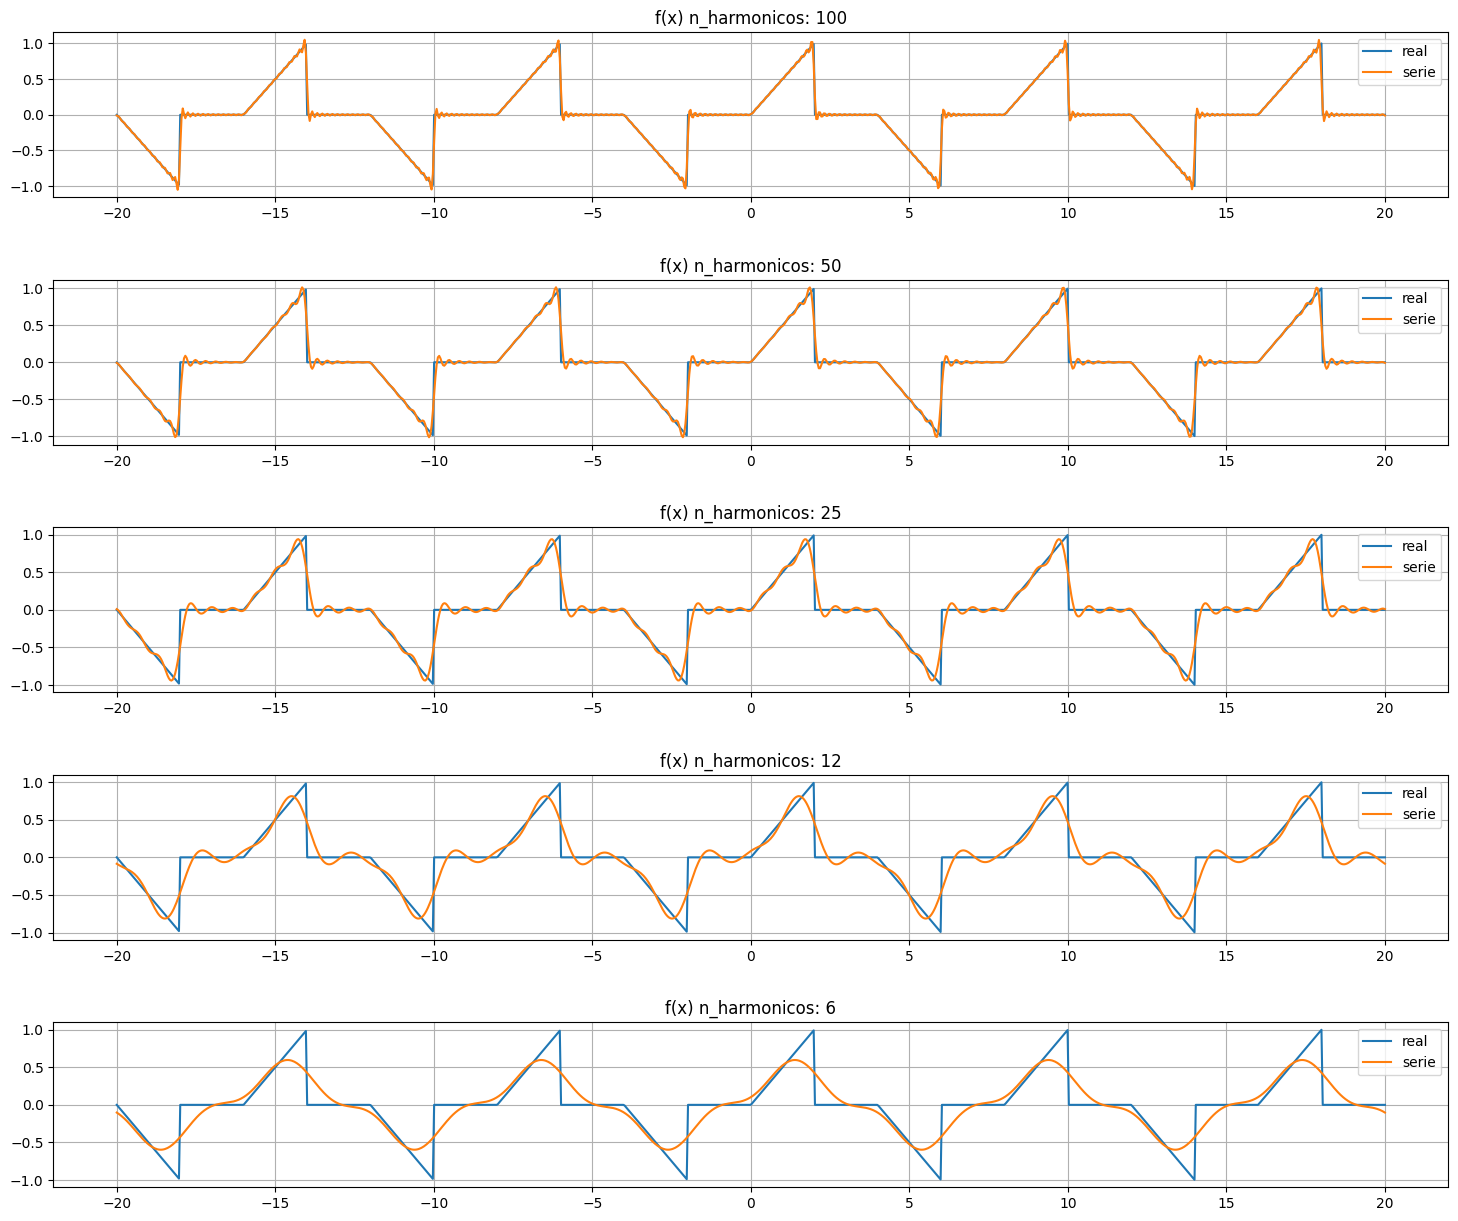

In [314]:
# Numero de periodos
t_len = 5

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 1000)

# Cria a figura e o plot e ativa o grid
fig, axs = plt.subplots(5, 1, figsize = (18, 15))
fig.subplots_adjust(hspace=0.5)



for i, ax in enumerate(axs):

    # Calculando para o numero de harmonicos
    # Numero de harmonicas
    ks_len = int(100 / (2 ** i))
    # Criando um vetor de harmonicas
    ks = np.arange(-int(ks_len / 2), int(ks_len / 2), 1)
    
    # Configurando o grafico
    ax.set_title(f'f(x) n_harmonicos: {ks_len}')
    ax.grid()

    # Desenha o grafico da onda real
    ax.plot(t, f(t), label='real')
    

    # Cria o grafico da onda estimada pela serie
    ax.plot(t, f_t_new(ks, t), label='serie')

    ax.legend()



# Show the plot
plt.show()

## Desenhando o grafico para um numero de harmonicas especifico (item 3)

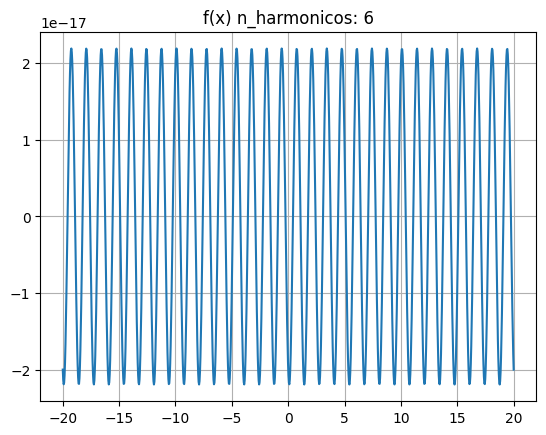

In [315]:
# Numero de periodos
t_len = 5

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 1000)

fig = plt.figure()
ax = fig.subplots()
# Numero de harmonicas
#ks_len = int(input('Numero de harmonicas'))

# Criando um vetor de harmonicas
#ks = np.arange(-ks_len / 2, ks_len / 2, 1)
ks = np.array([-6])
ax.set_title(f'f(x) n_harmonicos: {ks_len}')

# Cria o grafico da onda estimada pela serie
ax.plot(t, f_t_new(ks, t), label='serie')

ax.grid()

## Criando o grafico da magnitude e fase dos coeficientes

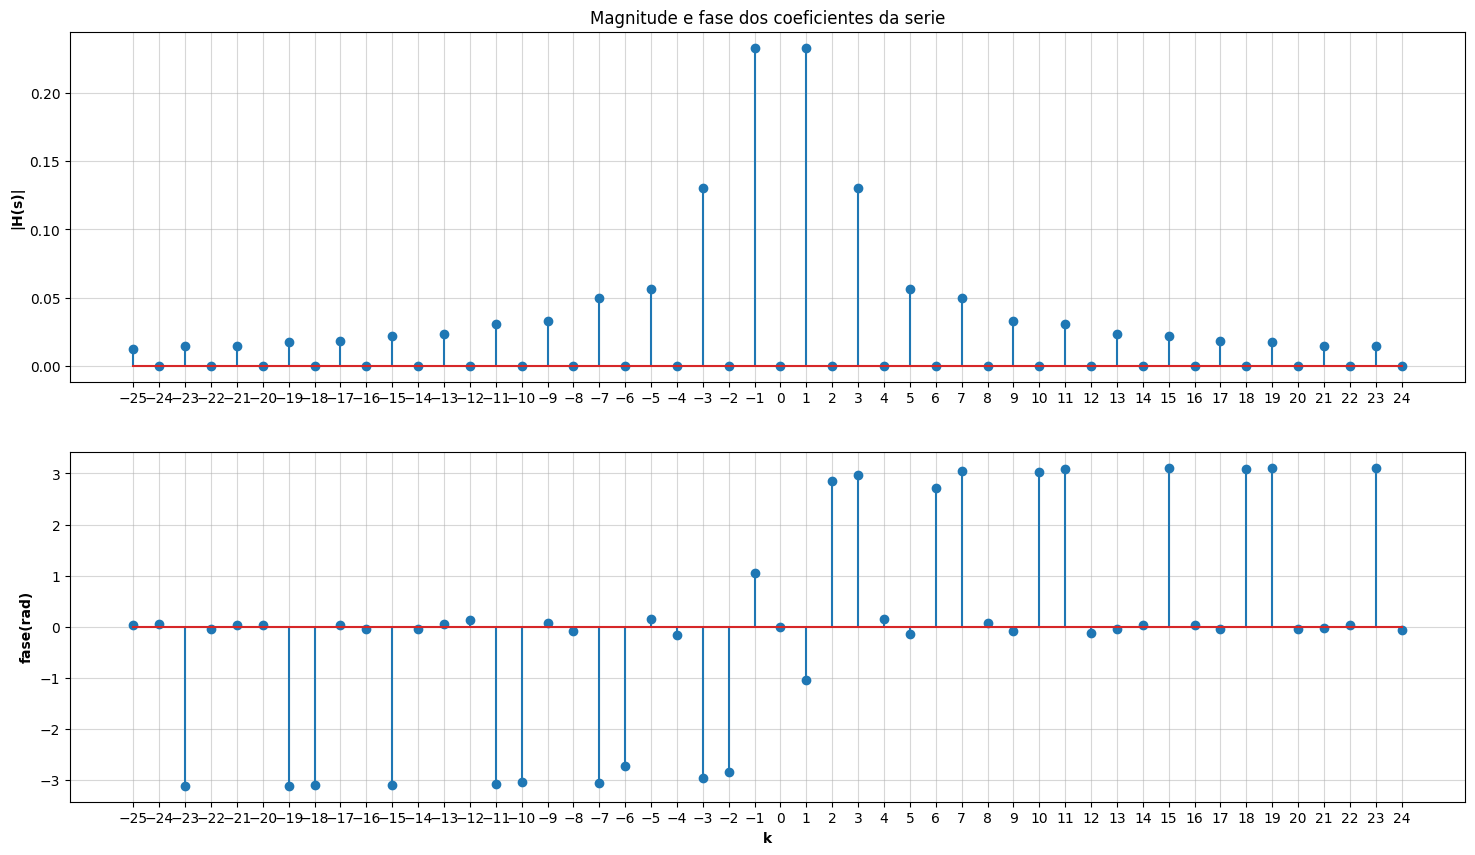

In [316]:
# Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
ck_k = sym.lambdify(k, ck)

# Numero de harmonicas
ks_len = 50

# Criando um vetor de harmonicas
ks = np.arange(-ks_len / 2, ks_len / 2, 1)

fig = plt.figure(figsize=(18, 10))
ax, ax2 = fig.subplots(2, 1)
ax.set_title("Magnitude e fase dos coeficientes da serie")

# Grafico da magnitude dos coeficientes
ax.stem(ks, np.abs(ck_k(ks)), label = '|Ck|')
ax.set_ylabel("|H(s)|", weight = "bold")
ax.set_xticks(ks)
ax.grid(alpha = 0.5)

# Grafico da fase dos coeficientes
ax2.stem(ks, np.angle(ck_k(ks)), label = 'Ck_fase')
ax2.set_ylabel("fase(rad)", weight = "bold")
ax2.set_xlabel("k", weight = "bold")
ax2.set_xticks(ks)
ax2.grid(alpha = 0.5)



In [317]:
np.rad2deg(2.9)

166.15776058793872

## Analise

Quanto ao espaçamento das componentes no eixo de frequência, em geral, quanto maior o período fundamental de um sinal, menor será o espaçamento entre as componentes no domínio da frequência. Isso ocorre porque a frequência fundamental é inversamente proporcional ao período fundamental. Portanto, se o período fundamental aumenta, a frequência fundamental diminui e, consequentemente, as componentes no eixo de frequência ficam mais espaçadas.



Em relação ao erro de aproximação pela série de Fourier devido às descontinuidades do sinal, é importante mencionar que a série de Fourier é mais adequada para sinais contínuos e suaves. Quando um sinal apresenta descontinuidades, como é o caso do sinal e^(-t) em t=0, a série de Fourier pode apresentar dificuldades em aproximar corretamente o sinal nessas regiões de descontinuidade. Isso ocorre porque a série de Fourier é baseada em funções senoidais contínuas, enquanto as descontinuidades introduzem componentes de alta frequência que podem não ser capturadas adequadamente pela série.

Quando o sinal é anti simet